In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# 0. 运动员表
## 0.1 去除奖项

In [2]:
# 读取数据
athletes = pd.read_csv('2025_Problem_C_Data/summerOly_athletes.csv')

# 删除重复的行
athletes = athletes.drop_duplicates()

# 处理缺失值
athletes = athletes.dropna()

# 转换数据类型
athletes['Year'] = athletes['Year'].astype(int)
athletes['Medal'] = athletes['Medal'].astype(str)

# 删除文字中的空格
# 去除列中所有字符串数据前后的空格
athletes['NOC'] = athletes['NOC'].str.strip()  # 去除前后的空格
athletes['Sport'] = athletes['Sport'].str.strip()
athletes['Name'] = athletes['Name'].str.strip()

# 删除列中所有字符串数据中的空格（包括内部的空格）
athletes['NOC'] = athletes['NOC'].str.replace(' ', '', regex=False)
athletes['Sport'] = athletes['Sport'].str.replace(' ', '', regex=False)
athletes['Name'] = athletes['Name'].str.replace(' ', '', regex=False)

# 打印清洗后的数据
athletes


,Name,Sex,Team,NOC,Year,City,Sport,Event,Medal
0,ADijiang,M,China,CHN,1992,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,ALamusi,M,China,CHN,2012,London,Judo,Judo Men's Extra-Lightweight,No medal
2,GunnarAaby,M,Denmark,DEN,1920,Antwerpen,Football,Football Men's Football,No medal
3,EdgarAabye,M,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Cornelia(-strannood),F,Netherlands,NED,1932,Los Angeles,Athletics,Athletics Women's 100 metres,No medal
...,...,...,...,...,...,...,...,...,...
252560,SeforaAda,F,Equatorial Guinea,GEQ,2024,Paris,Athletics,Women's 100m,No medal
252561,EmanuelaLiuzzi,F,Italy,ITA,2024,Paris,Wrestling,Women's Freestyle 50kg,No medal
252562,IsayahBoers,M,Netherlands,NED,2024,Paris,Athletics,4 x 400m Relay Mixed,Gold
252563,KevinStaut,M,France,FRA,2024,Paris,Equestrian,Jumping Team,Bronze


In [3]:
athletes_with_medal = athletes[athletes['Medal'] != 'No medal']
athletes_with_medal

,Name,Sex,Team,NOC,Year,City,Sport,Event,Medal
3,EdgarAabye,M,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
12,ArvoAaltonen,M,Finland,FIN,1920,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
13,ArvoAaltonen,M,Finland,FIN,1920,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
15,PaavoAaltonen,M,Finland,FIN,1948,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
16,PaavoAaltonen,M,Finland,FIN,1948,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
...,...,...,...,...,...,...,...,...,...
252551,QuincyWilson,M,United States,USA,2024,Paris,Athletics,4 x 400m Relay Mixed,Silver
252556,vanAnne,F,Netherlands,NED,2024,Paris,Athletics,Women's 4 x 400m Relay,Silver
252562,IsayahBoers,M,Netherlands,NED,2024,Paris,Athletics,4 x 400m Relay Mixed,Gold
252563,KevinStaut,M,France,FRA,2024,Paris,Equestrian,Jumping Team,Bronze


In [4]:
athletes_with_gold_medal = athletes[athletes['Medal'] == 'Gold']
athletes_with_gold_medal

,Name,Sex,Team,NOC,Year,City,Sport,Event,Medal
3,EdgarAabye,M,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
16,PaavoAaltonen,M,Finland,FIN,1948,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
18,PaavoAaltonen,M,Finland,FIN,1948,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
22,PaavoAaltonen,M,Finland,FIN,1948,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
33,RagnhildAamodt,F,Norway,NOR,2008,Beijing,Handball,Handball Women's Handball,Gold
...,...,...,...,...,...,...,...,...,...
252244,JanjaGarnbret,F,Slovenia,SLO,2024,Paris,SportClimbing,Women's Boulder & Lead,Gold
252475,CroixBethune,F,United States,USA,2024,Paris,Football,Women,Gold
252544,AaliyahButler,F,United States,USA,2024,Paris,Athletics,Women's 4 x 400m Relay,Gold
252550,QuincyWilson,M,United States,USA,2024,Paris,Athletics,Men's 4 x 400m Relay,Gold


## 0.2 离散点

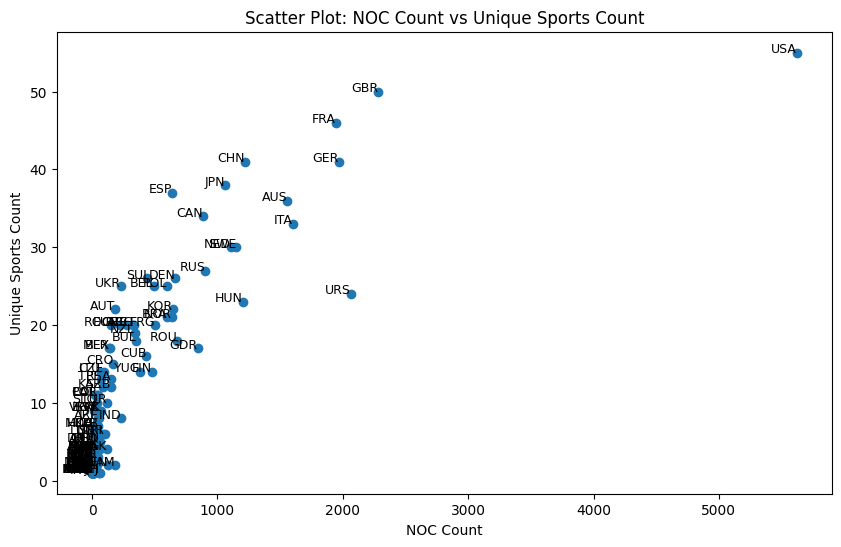

In [55]:
# 1. 计算每个 NOC 值的数量
noc_counts_medal = athletes_with_medal['NOC'].value_counts()

# 2. 计算每个 NOC 对应的不同 Sport 数量
sport_counts_medal_point = athletes_with_medal.groupby('NOC')['Sport'].nunique()

# 3. 计算每个 NOC 对应的不同 Sport 数量，确保它与 NOC 数量对应
noc_sport_counts_medal = noc_counts_medal.loc[sport_counts_medal_point.index]

# 4. 绘制散点图
plt.figure(figsize=(10, 6))
plt.scatter(noc_sport_counts_medal, sport_counts_medal_point)

# 在每个点上添加 NOC 标签
for noc, count, sport in zip(sport_counts_medal_point.index, noc_sport_counts_medal, sport_counts_medal_point):
    plt.text(count, sport, noc, fontsize=9, ha='right')

# 添加标签和标题
plt.xlabel('NOC Count')
plt.ylabel('Unique Sports Count')
plt.title('Scatter Plot: NOC Count vs Unique Sports Count')

# 显示图表
plt.show()


# 0.3 归一化排名和k-means

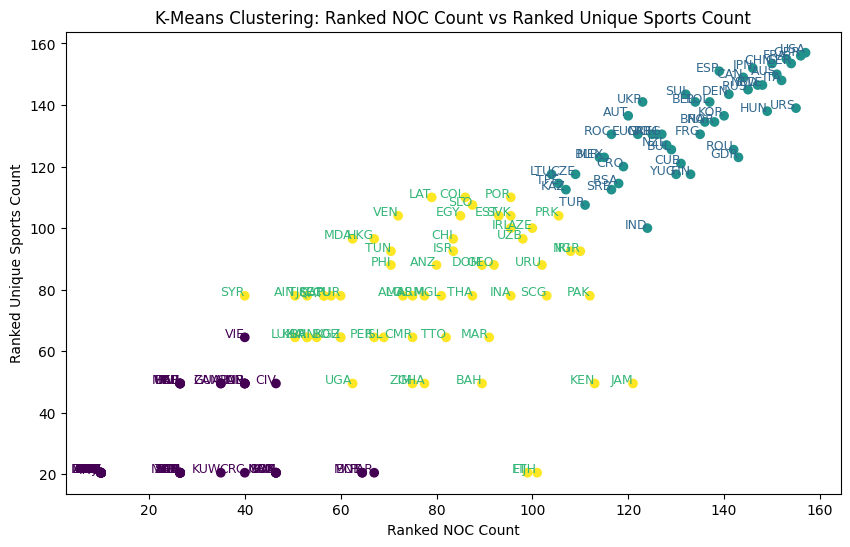

In [60]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# 1. 计算每个 NOC 值的数量
noc_counts_medal = athletes_with_medal['NOC'].value_counts()

# 2. 计算每个 NOC 对应的不同 Sport 数量
sport_counts_medal_kmeans = athletes_with_medal.groupby('NOC')['Sport'].nunique()

# 3. 计算每个 NOC 对应的不同 Sport 数量，确保它与 NOC 数量对应
noc_sport_counts_medal = noc_counts_medal.loc[sport_counts_medal_kmeans.index]

# 计算排名
noc_sport_counts_rank = noc_sport_counts_medal.rank()
sport_counts_rank = sport_counts_medal_kmeans.rank()

# 将排名数据合并成一个数据集进行 KMeans 聚类
X = np.column_stack([noc_sport_counts_rank, sport_counts_rank])

# 4. 使用 KMeans 聚类
kmeans = KMeans(n_clusters=3, random_state=42)  # 假设聚成 3 类
kmeans.fit(X)

# 获取聚类标签
labels = kmeans.labels_

# 5. 绘制散点图并使用不同颜色标记聚类结果
plt.figure(figsize=(10, 6))
plt.scatter(noc_sport_counts_rank, sport_counts_rank, c=labels, cmap='viridis')

# 在每个点上添加 NOC 标签
for noc, rank_noc, rank_sport, label in zip(sport_counts_medal_point.index, noc_sport_counts_rank, sport_counts_rank, labels):
    plt.text(rank_noc, rank_sport, noc, fontsize=9, ha='right', color=plt.cm.viridis(label / 3))  # 根据标签设置颜色

# 添加标签和标题
plt.xlabel('Ranked NOC Count')
plt.ylabel('Ranked Unique Sports Count')
plt.title('K-Means Clustering: Ranked NOC Count vs Ranked Unique Sports Count')

# 显示图表
plt.show()


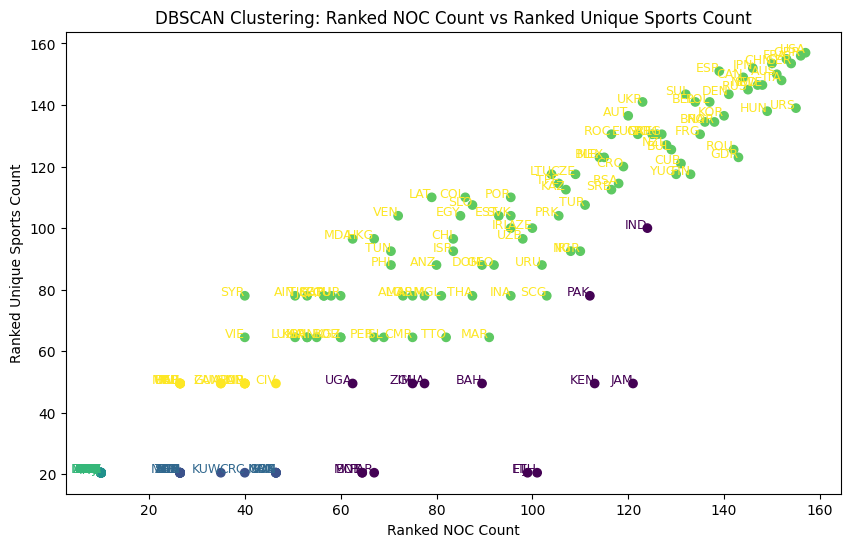

In [61]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

# 1. 计算每个 NOC 值的数量
noc_counts_medal = athletes_with_medal['NOC'].value_counts()

# 2. 计算每个 NOC 对应的不同 Sport 数量
sport_counts_medal_dbscan = athletes_with_medal.groupby('NOC')['Sport'].nunique()

# 3. 计算每个 NOC 对应的不同 Sport 数量，确保它与 NOC 数量对应
noc_sport_counts = noc_counts_medal.loc[sport_counts_medal_dbscan.index]

# 计算排名
noc_sport_counts_rank = noc_sport_counts.rank()
sport_counts_rank = sport_counts_medal_dbscan.rank()

# 将排名数据合并成一个数据集进行 DBSCAN 聚类
X = np.column_stack([noc_sport_counts_rank, sport_counts_rank])

# 4. 使用 DBSCAN 聚类
dbscan = DBSCAN(eps=14, min_samples=5)  # eps 是邻域的最大距离，min_samples 是每个簇的最小样本数
labels = dbscan.fit_predict(X)

# 5. 绘制散点图并使用不同颜色标记聚类结果
plt.figure(figsize=(10, 6))
plt.scatter(noc_sport_counts_rank, sport_counts_rank, c=labels, cmap='viridis')

# 在每个点上添加 NOC 标签
for noc, rank_noc, rank_sport, label in zip(sport_counts_medal_dbscan.index, noc_sport_counts_rank, sport_counts_rank, labels):
    plt.text(rank_noc, rank_sport, noc, fontsize=9, ha='right', color=plt.cm.viridis((label + 1) / 3))  # 根据标签设置颜色

# 添加标签和标题
plt.xlabel('Ranked NOC Count')
plt.ylabel('Ranked Unique Sports Count')
plt.title('DBSCAN Clustering: Ranked NOC Count vs Ranked Unique Sports Count')

# 显示图表
plt.show()


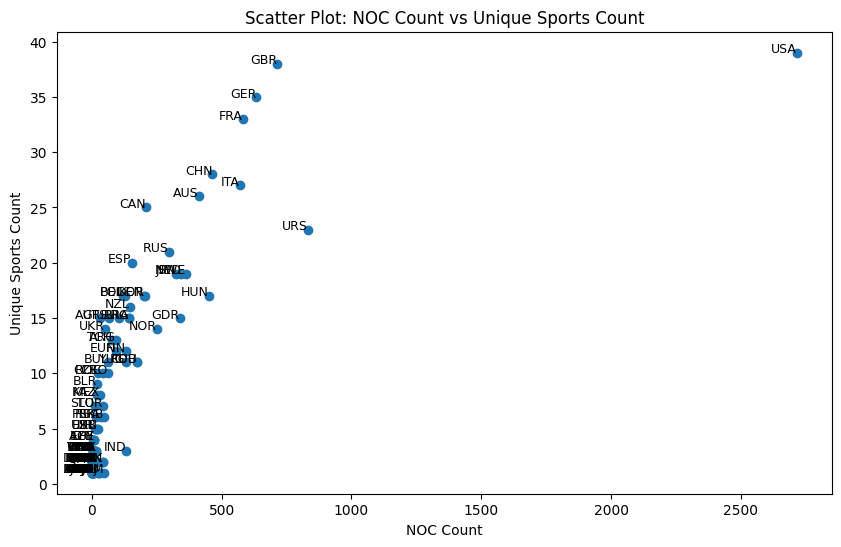

In [9]:
# 1. 计算每个 NOC 值的数量
noc_counts = athletes_with_gold_medal['NOC'].value_counts()

# 2. 计算每个 NOC 对应的不同 Sport 数量
sport_counts = athletes_with_gold_medal.groupby('NOC')['Sport'].nunique()

# 3. 计算每个 NOC 对应的不同 Sport 数量，确保它与 NOC 数量对应
noc_sport_counts = noc_counts.loc[sport_counts.index]

# 4. 绘制散点图
plt.figure(figsize=(10, 6))
plt.scatter(noc_sport_counts, sport_counts)

# 在每个点上添加 NOC 标签
for noc, count, sport in zip(sport_counts.index, noc_sport_counts, sport_counts):
    plt.text(count, sport, noc, fontsize=9, ha='right')

# 添加标签和标题
plt.xlabel('NOC Count')
plt.ylabel('Unique Sports Count')
plt.title('Scatter Plot: NOC Count vs Unique Sports Count')

# 显示图表
plt.show()


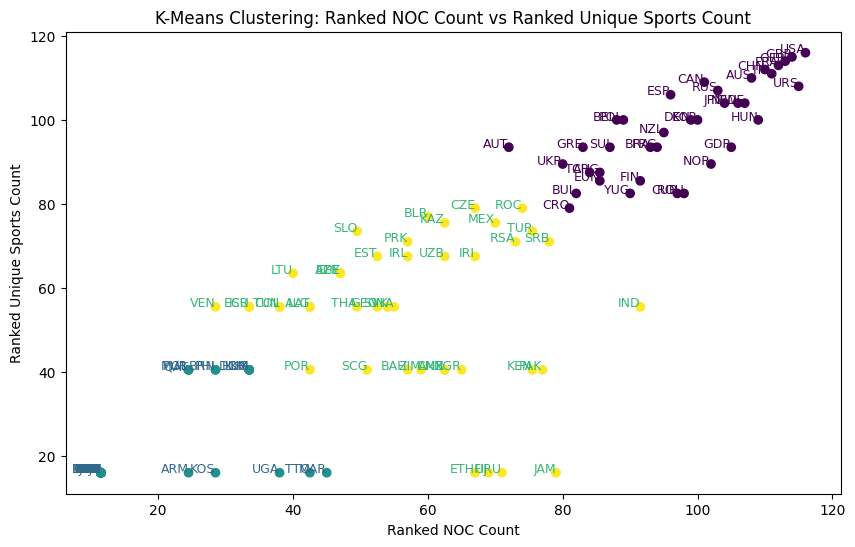

In [62]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# 1. 计算每个 NOC 值的数量
noc_counts = athletes_with_gold_medal['NOC'].value_counts()

# 2. 计算每个 NOC 对应的不同 Sport 数量
sport_counts = athletes_with_gold_medal.groupby('NOC')['Sport'].nunique()

# 3. 计算每个 NOC 对应的不同 Sport 数量，确保它与 NOC 数量对应
noc_sport_counts = noc_counts.loc[sport_counts.index]

# 计算排名
noc_sport_counts_rank = noc_sport_counts.rank()
sport_counts_rank = sport_counts.rank()

# 将排名数据合并成一个数据集进行 KMeans 聚类
X = np.column_stack([noc_sport_counts_rank, sport_counts_rank])

# 4. 使用 KMeans 聚类
kmeans = KMeans(n_clusters=3, random_state=42)  # 假设聚成 3 类
kmeans.fit(X)

# 获取聚类标签
labels = kmeans.labels_

# 5. 绘制散点图并使用不同颜色标记聚类结果
plt.figure(figsize=(10, 6))
plt.scatter(noc_sport_counts_rank, sport_counts_rank, c=labels, cmap='viridis')

# 在每个点上添加 NOC 标签
for noc, rank_noc, rank_sport, label in zip(sport_counts.index, noc_sport_counts_rank, sport_counts_rank, labels):
    plt.text(rank_noc, rank_sport, noc, fontsize=9, ha='right', color=plt.cm.viridis(label / 3))  # 根据标签设置颜色

# 添加标签和标题
plt.xlabel('Ranked NOC Count')
plt.ylabel('Ranked Unique Sports Count')
plt.title('K-Means Clustering: Ranked NOC Count vs Ranked Unique Sports Count')

# 显示图表
plt.show()


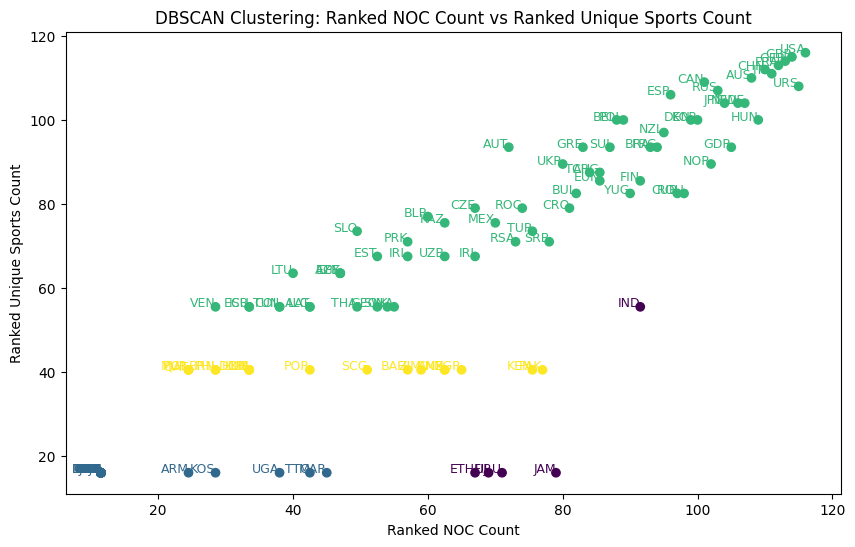

In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

# 1. 计算每个 NOC 值的数量
noc_counts = athletes_with_gold_medal['NOC'].value_counts()

# 2. 计算每个 NOC 对应的不同 Sport 数量
sport_counts = athletes_with_gold_medal.groupby('NOC')['Sport'].nunique()

# 3. 计算每个 NOC 对应的不同 Sport 数量，确保它与 NOC 数量对应
noc_sport_counts = noc_counts.loc[sport_counts.index]

# 计算排名
noc_sport_counts_rank = noc_sport_counts.rank()
sport_counts_rank = sport_counts.rank()

# 将排名数据合并成一个数据集进行 DBSCAN 聚类
X = np.column_stack([noc_sport_counts_rank, sport_counts_rank])

# 4. 使用 DBSCAN 聚类
dbscan = DBSCAN(eps=14, min_samples=5)  # eps 是邻域的最大距离，min_samples 是每个簇的最小样本数
labels = dbscan.fit_predict(X)

# 5. 绘制散点图并使用不同颜色标记聚类结果
plt.figure(figsize=(10, 6))
plt.scatter(noc_sport_counts_rank, sport_counts_rank, c=labels, cmap='viridis')

# 在每个点上添加 NOC 标签
for noc, rank_noc, rank_sport, label in zip(sport_counts.index, noc_sport_counts_rank, sport_counts_rank, labels):
    plt.text(rank_noc, rank_sport, noc, fontsize=9, ha='right', color=plt.cm.viridis((label + 1) / 3))  # 根据标签设置颜色

# 添加标签和标题
plt.xlabel('Ranked NOC Count')
plt.ylabel('Ranked Unique Sports Count')
plt.title('DBSCAN Clustering: Ranked NOC Count vs Ranked Unique Sports Count')

# 显示图表
plt.show()


# 1.数据预处理分析
# 1.1 东道主分析

In [12]:
hosts = pd.read_csv('2025_Problem_C_Data/summerOly_hosts.csv')
hosts

,Year,Host,NOC
0,1896,"Athens, Greece",GRE
1,1900,"Paris, France",FRA
2,1904,"St. Louis, United States",USA
3,1908,"London, United Kingdom",GRB
4,1912,"Stockholm, Sweden",SWE
5,1916,Cancelled (WWI – Berlin had been awarded),NaN
6,1920,"Antwerp, Belgium",BEL
7,1924,"Paris, France",FRA
8,1928,"Amsterdam, Netherlands",NED
9,1932,"Los Angeles, United States",USA


    Year                                         Host  NOC
5   1916    Cancelled (WWI – Berlin had been awarded)  NaN
10  1936                              Berlin, Germany  NaN
11  1940    Cancelled (WWII – Tokyo had been awarded)  NaN
12  1944   Cancelled (WWII – London had been awarded)  NaN
33  2028                   Los Angeles, United States  NaN
34  2032                          Brisbane, Australia  NaN


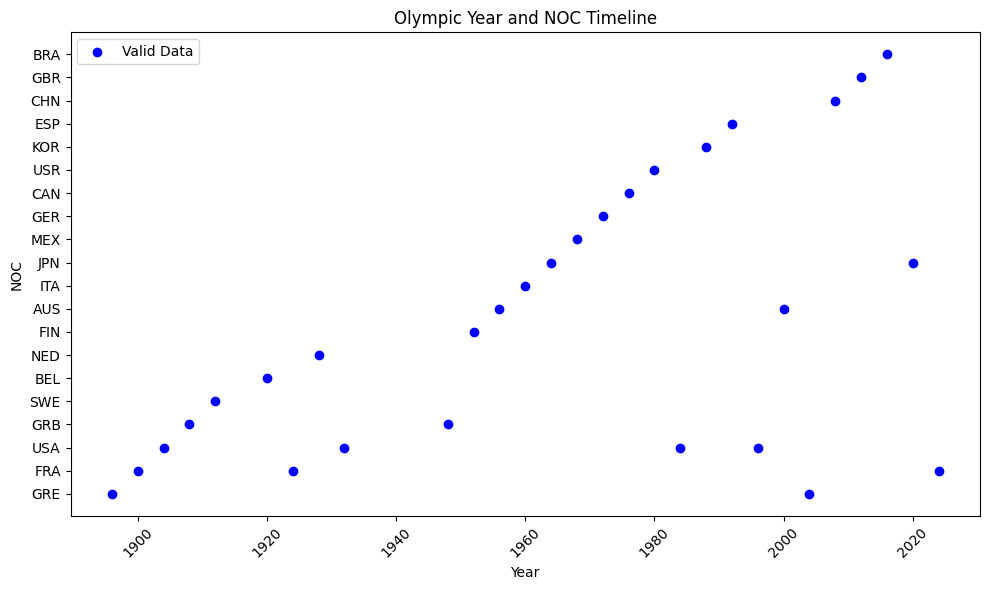

In [13]:
# 创建一个图形
plt.figure(figsize=(10, 6))

# 绘制正常的数据点
valid_data = hosts.dropna()  # 去掉NaN值的数据
plt.scatter(valid_data['Year'], valid_data['NOC'], color='b', marker='o', label='Valid Data')

# 找到 'Year' 或 'NOC' 列有NaN的行
invalid_data = hosts[hosts['Year'].isna() | hosts['NOC'].isna()]  # 确保检查 'Year' 或 'NOC' 中的NaN

# 输出NaN数据
print(invalid_data)

# 设置图标题和标签
plt.title('Olympic Year and NOC Timeline')
plt.xlabel('Year')
plt.ylabel('NOC')
plt.xticks(rotation=45)
plt.tight_layout()

# 添加图例
plt.legend()

# 显示图形
plt.show()

# 1.2 奖牌映射

In [14]:
medal_counts = pd.read_csv('2025_Problem_C_Data/summerOly_medal_counts.csv')
medal_counts

,Rank,Country,NOC,Gold,Silver,Bronze,Total,Year
0,1,United States,NaN,11,7,2,20,1896
1,2,Greece,NaN,10,18,19,47,1896
2,3,Germany,NaN,6,5,2,13,1896
3,4,France,NaN,5,4,2,11,1896
4,5,Great Britain,NaN,2,3,2,7,1896
...,...,...,...,...,...,...,...,...
1430,84,Qatar,NaN,0,0,1,1,2024
1431,84,Refugee Olympic Team,NaN,0,0,1,1,2024
1432,84,Singapore,NaN,0,0,1,1,2024
1433,84,Slovakia,NaN,0,0,1,1,2024


In [15]:
# 统计每个国家的出现次数
country_counts = medal_counts['Country'].value_counts()
country_counts

Country
Great Britain           28
France                  28
Denmark                 27
United States           27
Canada                  26
                        ..
Saint Lucia              1
Dominica                 1
Albania                  1
Cabo Verde               1
Refugee Olympic Team     1
Name: count, Length: 210, dtype: int64

## NOC 键值对和输出的csv

In [100]:
country_to_noc = {
    'Great Britain': 'GBR',
    'France': 'FRA',
    'Denmark': 'DEN',
    'United States': 'USA',
    'Canada': 'CAN',
    'Hungary': 'HUN',
    'Switzerland': 'SUI',
    'Australia': 'AUS',
    'Italy': 'ITA',
    'Belgium': 'BEL',
    'Sweden': 'SWE',
    'Norway': 'NOR',
    'Netherlands': 'NED',
    'Austria': 'AUT',
    'Finland': 'FIN',
    'Japan': 'JPN',
    'Poland': 'POL',
    'New Zealand': 'NZL',
    'Mexico': 'MEX',
    'Greece': 'GRE',
    'Romania': 'ROU',
    'Brazil': 'BRA',
    'Spain': 'ESP',
    'Argentina': 'ARG',
    'South Africa': 'RSA',
    'India': 'IND',
    'Turkey': 'TUR',
    'South Korea': 'KOR',
    'Cuba': 'CUB',
    'Germany': 'GER',
    'Jamaica': 'JAM',
    'Iran': 'IRI',
    'Bulgaria': 'BUL',
    'Portugal': 'PRT',
    'Czechoslovakia': 'TCH',
    'Ireland': 'IRL',
    'Kenya': 'KEN',
    'Yugoslavia': 'YUG',
    'Mongolia': 'MNG',
    'Ethiopia': 'ETH',
    'Thailand': 'THA',
    'Egypt': 'EGY',
    'China': 'CHN',
    'North Korea': 'PRK',
    'Colombia': 'COL',
    'Estonia': 'EST',
    'Morocco': 'MAR',
    'Trinidad and Tobago': 'TTO',
    'Chinese Taipei': 'TPE',
    'Nigeria': 'NGA',
    'Venezuela': 'VEN',
    'Bahamas': 'BAH',
    'Indonesia': 'INA',
    'Pakistan': 'PAK',
    'Tunisia': 'TUN',
    'Philippines': 'PHI',
    'Puerto Rico': 'PUR',
    'Lithuania': 'LTU',
    'Croatia': 'HRV',
    'Slovenia': 'SVN',
    'Slovakia': 'SVK',
    'Ukraine': 'UKR',
    'Algeria': 'ALG',
    'Kazakhstan': 'KAZ',
    'Israel': 'ISR',
    'Uzbekistan': 'UZB',
    'Chile': 'CHL',
    'Soviet Union': 'URS',
    'Czech Republic': 'CZE',
    'Latvia': 'LAT',
    'Azerbaijan': 'AZE',
    'Georgia': 'GEO',
    'Belarus': 'BLR',
    'Malaysia': 'MAS',
    'Uganda': 'UGA',
    'Dominican Republic': 'DOM',
    'Uruguay': 'URU',
    'Armenia': 'ARM',
    'Qatar': 'QAT',
    'Russia': 'RUS',
    'Cameroon': 'CMR',
    'Peru': 'PER',
    'Serbia': 'SRB',
    'East Germany': 'GDR',
    'West Germany': 'FRG',
    'Moldova': 'MDA',
    'Hong Kong': 'HKG',
    'Syria': 'SYR',
    'Ivory Coast': 'CIV',
    'Iceland': 'ISL',
    'Ghana': 'GHA',
    'Tajikistan': 'TJK',
    'Vietnam': 'VNM',
    'Bahrain': 'BRN',
    'Ecuador': 'ECU',
    'Kyrgyzstan': 'KGZ',
    'Singapore': 'SGP',
    'Grenada': 'GRD',
    'Kosovo': 'KSV',
    'Panama': 'PAN',
    'Mixed team': 'MIX',
    'Luxembourg': 'LUX',
    'Jordan': 'JOR',
    'Botswana': 'BWA',
    'Fiji': 'FJI',
    'Kuwait': 'KUW',
    'Zambia': 'ZAM',
    'Namibia': 'NAM',
    'Saudi Arabia': 'KSA',
    'Lebanon': 'LBN',
    'Zimbabwe': 'ZIM',
    'Costa Rica': 'CRC',
    'FR Yugoslavia': 'YUG',
    'Russian Empire': 'RUS',
    'Guatemala': 'GTM',
    'Afghanistan': 'AFG',
    'Cyprus': 'CYP',
    'Burundi': 'BDI',
    'Mozambique': 'MOZ',
    'Bohemia': 'BOH',
    'Australasia': 'AUS',
    'Haiti': 'HTI',
    'United Team of Germany': 'GDR',
    'Bermuda': 'BER',
    'Niger': 'NER',
    'United Arab Emirates': 'ARE',
    'Suriname': 'SUR',
    'Guyana': 'GUY',
    'Ceylon': 'CEY',
    'Formosa': 'TPE',
    'Iraq': 'IRQ',
    'British West Indies': 'BWI',
    'Unified Team': 'EUN',
    'Djibouti': 'DJI',
    'Virgin Islands': 'VIR',
    'Senegal': 'SEN',
    'Netherlands Antilles': 'ANT',
    'Taiwan': 'TPE',
    'Tanzania': 'TAN',
    'Independent Olympic Participants': 'IOP',
    'Macedonia': 'MKD',
    'Barbados': 'BRB',
    'Sri Lanka': 'LKA',
    'Tonga': 'TON',
    'Sudan': 'SDN',
    'Samoa': 'SAM',
    'Paraguay': 'PRY',
    'Eritrea': 'ERI',
    'Gabon': 'GAB',
    'Togo': 'TOG',
    'Mauritius': 'MRI',
    'Serbia and Montenegro': 'SCG',
    'Independent Olympic Athletes': 'IOA',
    'Montenegro': 'MNE',
    'ROC': 'ROC',
    'San Marino': 'SMR',
    'North Macedonia': 'MKD',
    'Turkmenistan': 'TKM',
    'Burkina Faso': 'BFA',
    'Saint Lucia': 'LCA',
    'Dominica': 'DMA',
    'Albania': 'ALB',
    'Cabo Verde': 'CPV',
    'Refugee Olympic Team': 'ROT'
}


In [103]:
# 创建 DataFrame，其中每个键值对作为一行
df = pd.DataFrame([(key, ', '.join(value) if isinstance(value, list) else value) for key, value in country_to_noc.items()], columns=['key', 'value'])

# 保存为CSV
df.to_csv('NOC_dict.csv', index=False)

print("CSV文件已保存")

CSV文件已保存


In [86]:
# 使用 .map() 方法将 'Country' 列的值转换为 'NOC'
medal_counts['NOC'] = medal_counts['Country'].map(country_to_noc)
medal_counts

,Rank,Country,NOC,Gold,Silver,Bronze,Total,Year
0,1,United States,USA,11,7,2,20,1896
1,2,Greece,GRE,10,18,19,47,1896
2,3,Germany,GER,6,5,2,13,1896
3,4,France,FRA,5,4,2,11,1896
4,5,Great Britain,GBR,2,3,2,7,1896
...,...,...,...,...,...,...,...,...
1430,84,Qatar,QAT,0,0,1,1,2024
1431,84,Refugee Olympic Team,ROT,0,0,1,1,2024
1432,84,Singapore,SGP,0,0,1,1,2024
1433,84,Slovakia,SVK,0,0,1,1,2024


# 1.3 项目表

In [87]:
programs = pd.read_csv('2025_Problem_C_Data/summerOly_programs.csv')
programs

,Sport,Discipline,Code,Sports Governing Body,1896,1900,1904,1906*,1908,1912,...,1988,1992,1996,2000,2004,2008,2012,2016,2020,2024
0,Aquatics,Artistic Swimming,SWA,World Aquatics,0,0,0,0,0,0,...,2,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1,Aquatics,Diving,DIV,World Aquatics,0,0,2,1,2,4,...,4,4.0,4.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0
2,Aquatics,Marathon Swimming,OWS,World Aquatics,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0
3,Aquatics,Swimming,SWM,World Aquatics,4,7,9,4,6,9,...,31,31.0,32.0,32.0,32.0,32.0,32.0,32.0,35.0,35.0
4,Aquatics,Water Polo,WPO,World Aquatics,0,1,1,0,1,1,...,1,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,Skating,Figure,FSK,ISU,0,0,0,0,4,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,Ice Hockey,Ice Hockey,IHO,IIHF,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,Total events,Total events,Total events,Total events,43,97,95,76,110,102,...,237,257.0,271.0,300.0,301.0,302.0,302.0,306.0,339.0,329.0
72,Total disciplines,Total disciplines,Total disciplines,Total disciplines,10,22,18,13,25,18,...,31,34.0,37.0,40.0,40.0,42.0,40.0,42.0,50.0,48.0


## 1.4 统计奖牌数

<Figure size 1000x600 with 0 Axes>

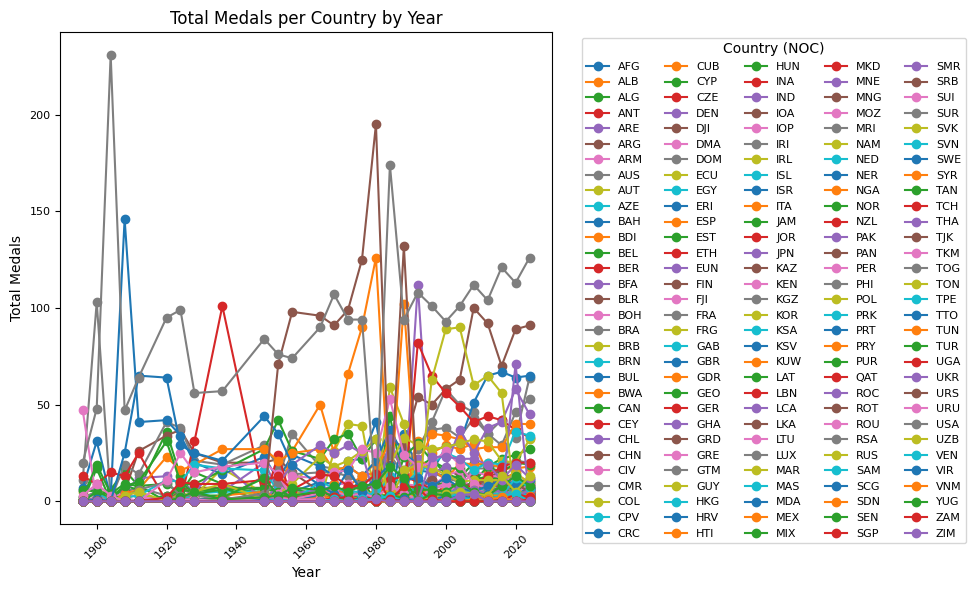

In [88]:
# Group by Year and Country, summing total medals
medals_by_year = medal_counts.groupby(['Year', 'NOC'])['Total'].sum().unstack(fill_value=0)

# 绘制折线图
plt.figure(figsize=(10, 6))
medals_by_year.plot(kind='line', marker='o', figsize=(10, 6))  # Use a colormap

# 设置标题、标签和图例的字体大小
plt.title('Total Medals per Country by Year')
plt.xlabel('Year')
plt.ylabel('Total Medals')
plt.xticks(rotation=45, fontsize=8)  # 设置 x 轴刻度字体大小
plt.yticks(fontsize=8)  # 设置 y 轴刻度字体大小

# 设置图例的字体大小，并显示为四列
plt.legend(title='Country (NOC)', fontsize=8, title_fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left', ncol=5)

plt.tight_layout()
plt.show()


- 参赛人数统计

<Figure size 1000x600 with 0 Axes>

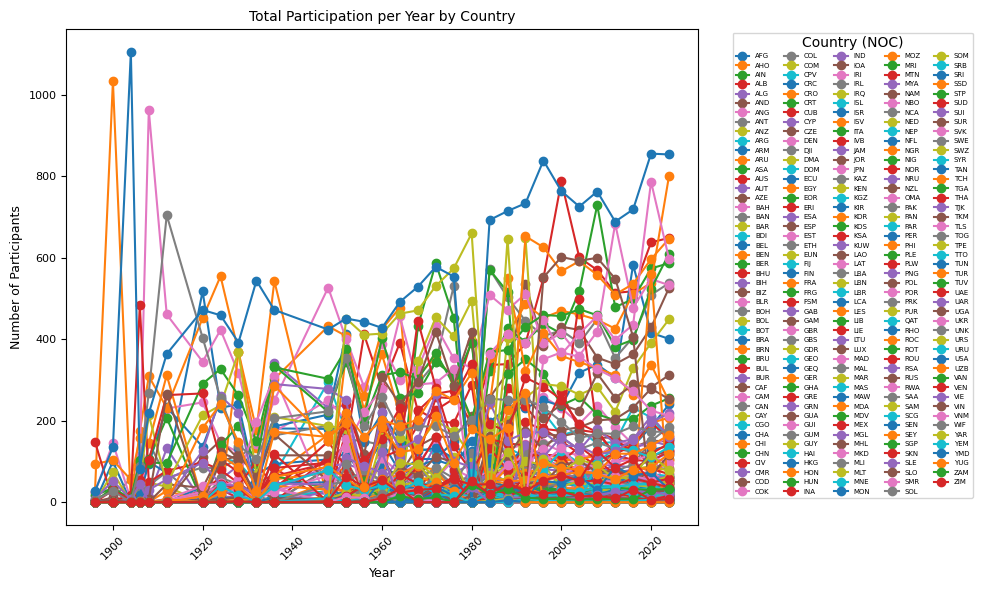

In [89]:
import matplotlib.pyplot as plt

# 按年份和国家（NOC）统计参赛人数
participation_by_year_country = athletes.groupby(['Year', 'NOC']).size().unstack(fill_value=0)

# 绘制折线图
plt.figure(figsize=(10, 6))
participation_by_year_country.plot(kind='line', marker='o', figsize=(10, 6))

# 设置标题、标签和图例的字体大小
plt.title('Total Participation per Year by Country', fontsize=10)  # 设置标题字体大小
plt.xlabel('Year', fontsize=9)  # 设置 x 轴标签字体大小
plt.ylabel('Number of Participants', fontsize=9)  # 设置 y 轴标签字体大小
plt.xticks(rotation=45, fontsize=8)  # 设置 x 轴刻度字体大小
plt.yticks(fontsize=8)  # 设置 y 轴刻度字体大小

plt.legend(title='Country (NOC)', fontsize=5, title_fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left', ncol=5)

plt.tight_layout()
plt.show()


# 1.5 数据清洗
- 去除参赛人数Year中后三项全为0的列
- 删除东道主点
- 删除离群点，阈值为20
- 线性插值填充NAN

In [90]:
# 按年份和国家（NOC）统计参赛人数
medals_by_year = medal_counts.groupby(['Year', 'NOC'])['Total'].sum().unstack(fill_value=0)

# 删除 `participation_by_year_country` 表中最后三行全为0的列
# 假设 `participation_by_year_country` 是已经存在的 DataFrame
bad_columns = participation_by_year_country.iloc[-3:].sum(axis=0) == 0  # 找到最后三行全为0的列
columns_to_delete = bad_columns[bad_columns].index  # 获取这些列的列名

# 从 `medals_by_year_clean` 表中删除这些列
medals_by_year_clean = medals_by_year.loc[:, ~medals_by_year.columns.isin(columns_to_delete)]

# 遍历 hosts 表的每一行，获取 Year 和 NOC
for _, row in hosts.iterrows():
    year = row['Year']
    noc = row['NOC']
    
    # 如果该 Year 和 NOC 在 participation_by_year_country_q1_clean 中，设置为 NaN
    if year in medals_by_year_clean.index and noc in medals_by_year_clean.columns:
        medals_by_year_clean.at[year, noc] = None  # 设置为 NaN

# 设置一个阈值，假设阈值为某个差异的倍数，可以根据数据调整
threshold = 50

# 对每个国家的参赛人数进行遍历，计算相邻年份之间的差异
for country in medals_by_year_clean.columns:
    for year in range(1, len(medals_by_year_clean)):
        # 计算当前年份和上一年份之间的差异
        previous_value = medals_by_year_clean.loc[medals_by_year_clean.index[year - 1], country]
        current_value = medals_by_year_clean.loc[medals_by_year_clean.index[year], country]
        
        difference = abs(current_value - previous_value)
        
        # 如果差异大于阈值，认为是坏点
        if difference > threshold:
            medals_by_year_clean.loc[medals_by_year_clean.index[year], country] = None  # 设置为 NaN

# 对坏点（NaN）进行线性插值填充
medals_by_year_clean = medals_by_year_clean.interpolate(method='linear', axis=0)



<Figure size 1000x600 with 0 Axes>

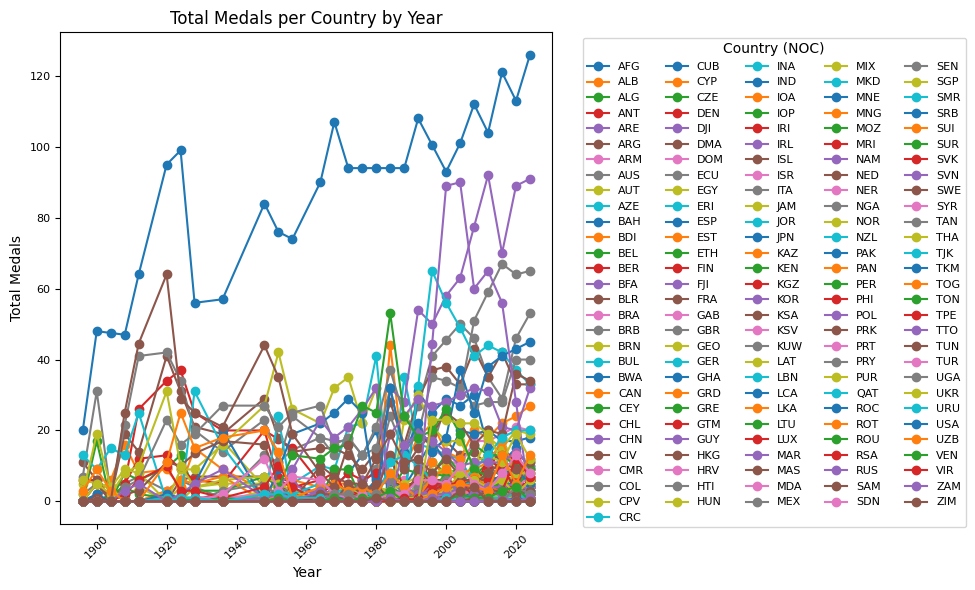

In [91]:
# 绘制折线图
plt.figure(figsize=(10, 6))
medals_by_year_clean.plot(kind='line', marker='o', figsize=(10, 6))  # Use a colormap

# 设置标题、标签和图例的字体大小
plt.title('Total Medals per Country by Year')
plt.xlabel('Year')
plt.ylabel('Total Medals')
plt.xticks(rotation=45, fontsize=8)  # 设置 x 轴刻度字体大小
plt.yticks(fontsize=8)  # 设置 y 轴刻度字体大小

# 设置图例的字体大小，并显示为四列
plt.legend(title='Country (NOC)', fontsize=8, title_fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left', ncol=5)

plt.tight_layout()
plt.show()


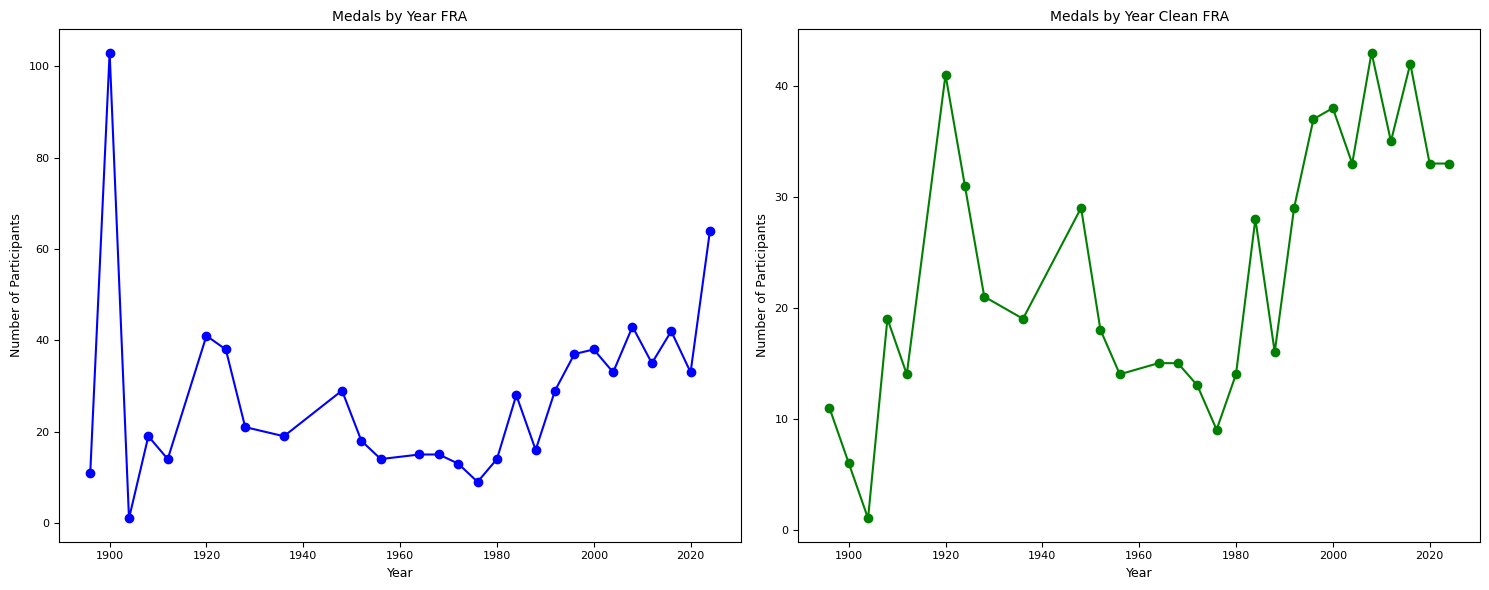

In [92]:
# 创建一个 1 行 2 列的子图布局
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

NOC = 'FRA'

# 绘制第一个子图: medals_by_year_clean
axes[0].plot(medals_by_year[NOC], marker='o', color='b')
axes[0].set_title(f'Medals by Year {NOC}', fontsize=10)
axes[0].set_xlabel('Year', fontsize=9)
axes[0].set_ylabel('Number of Participants', fontsize=9)
axes[0].tick_params(axis='x', labelsize=8)
axes[0].tick_params(axis='y', labelsize=8)

# 绘制第二个子图: medals_by_year
axes[1].plot(medals_by_year_clean[NOC], marker='o', color='g')
axes[1].set_title(f'Medals by Year Clean {NOC}', fontsize=10)
axes[1].set_xlabel('Year', fontsize=9)
axes[1].set_ylabel('Number of Participants', fontsize=9)
axes[1].tick_params(axis='x', labelsize=8)
axes[1].tick_params(axis='y', labelsize=8)

# 设置整体布局
plt.tight_layout()

# 显示图表
plt.show()


## 1.6 获得刚才聚类中能做时间序列部分，并过滤

In [93]:
# 获取每个聚类中 NOC 的索引
clustered_nocs = {}
for label in np.unique(labels):
    clustered_nocs[label] = sport_counts.index[labels == label].tolist()

# 输出每个类的 NOC
for cluster, nocs in clustered_nocs.items():
    print(f"Cluster {cluster}: {nocs}")


Cluster 0: ['ARG', 'AUS', 'AUT', 'BEL', 'BRA', 'BUL', 'CAN', 'CHN', 'CRO', 'CUB', 'DEN', 'ESP', 'EUN', 'FIN', 'FRA', 'FRG', 'GBR', 'GDR', 'GER', 'GRE', 'HUN', 'ITA', 'JPN', 'KOR', 'NED', 'NOR', 'NZL', 'POL', 'ROU', 'RUS', 'SUI', 'SWE', 'TCH', 'UKR', 'URS', 'USA', 'YUG']
Cluster 1: ['AIN', 'ARM', 'BDI', 'BER', 'BOT', 'BRN', 'CHI', 'CIV', 'CRC', 'DMA', 'DOM', 'GRN', 'GUA', 'HAI', 'HKG', 'IOA', 'JOR', 'KOS', 'LCA', 'LUX', 'MAR', 'MGL', 'MOZ', 'PAN', 'PER', 'PHI', 'PUR', 'QAT', 'SGP', 'SUR', 'SYR', 'TJK', 'TTO', 'UAE', 'UGA', 'VIE']
Cluster 2: ['ALG', 'ANZ', 'AZE', 'BAH', 'BLR', 'CMR', 'COL', 'CZE', 'ECU', 'EGY', 'EST', 'ETH', 'FIJ', 'GEO', 'INA', 'IND', 'IRI', 'IRL', 'ISR', 'JAM', 'KAZ', 'KEN', 'LAT', 'LTU', 'MEX', 'NGR', 'PAK', 'POR', 'PRK', 'ROC', 'RSA', 'SCG', 'SLO', 'SRB', 'SVK', 'THA', 'TPE', 'TUN', 'TUR', 'URU', 'UZB', 'VEN', 'ZIM']


- Cluster 0 : 可以时间序列的类
- Cluster 1 : 较没参考意义的数据，直接均值预测
- Cluster 2 : 需要重写建模的类

In [94]:
# 获取 Cluster 0 中的 NOC 列
cluster_0_nocs = clustered_nocs[0]

# 只保留 Cluster 0 中的 NOC 列
medals_by_year_clean_cluster_0_columns = medals_by_year_clean.loc[:, medals_by_year_clean.columns.isin(cluster_0_nocs)]

# 显示结果
medals_by_year_clean_cluster_0_columns


NOC,ARG,AUS,AUT,BEL,BRA,BUL,CAN,CHN,CUB,DEN,...,NED,NOR,NZL,POL,ROU,RUS,SUI,SWE,UKR,USA
Year,,,,,,,,,,,,,,,,,,,,,
1896,0,2.0,5,0.0,0.0,0,0.0,0.0,0,6,...,0.0,0,0,0,0,0.0,3,0.0,0,20.0
1900,0,5.0,6,17.0,0.0,0,2.0,0.0,2,6,...,5.0,5,0,0,0,0.0,9,1.0,0,48.0
1904,0,4.0,3,0.0,0.0,0,6.0,0.0,3,0,...,0.0,2,0,0,0,0.0,3,0.0,0,47.5
1908,0,5.0,1,8.0,0.0,0,16.0,0.0,0,5,...,2.0,8,0,0,0,3.0,0,25.0,0,47.0
1912,0,7.0,4,6.0,0.0,0,8.0,0.0,0,12,...,3.0,10,0,0,0,5.0,0,44.5,0,64.0
1920,0,3.0,0,9.5,3.0,0,9.0,0.0,0,13,...,11.0,31,1,0,0,0.0,11,64.0,0,95.0
1924,6,6.0,4,13.0,0.0,0,4.0,0.0,0,9,...,10.0,10,1,2,1,0.0,25,29.0,0,99.0
1928,7,4.0,3,3.0,0.0,0,15.0,0.0,0,6,...,13.5,4,1,5,0,0.0,15,25.0,0,56.0
1936,7,1.0,17,3.0,0.0,0,9.0,0.0,0,5,...,17.0,6,1,9,1,0.0,18,21.0,0,57.0


## 1.7 隐马尔可夫模型
- 引入时间加权，给较近年份更高权重
- 作为对比参照模型

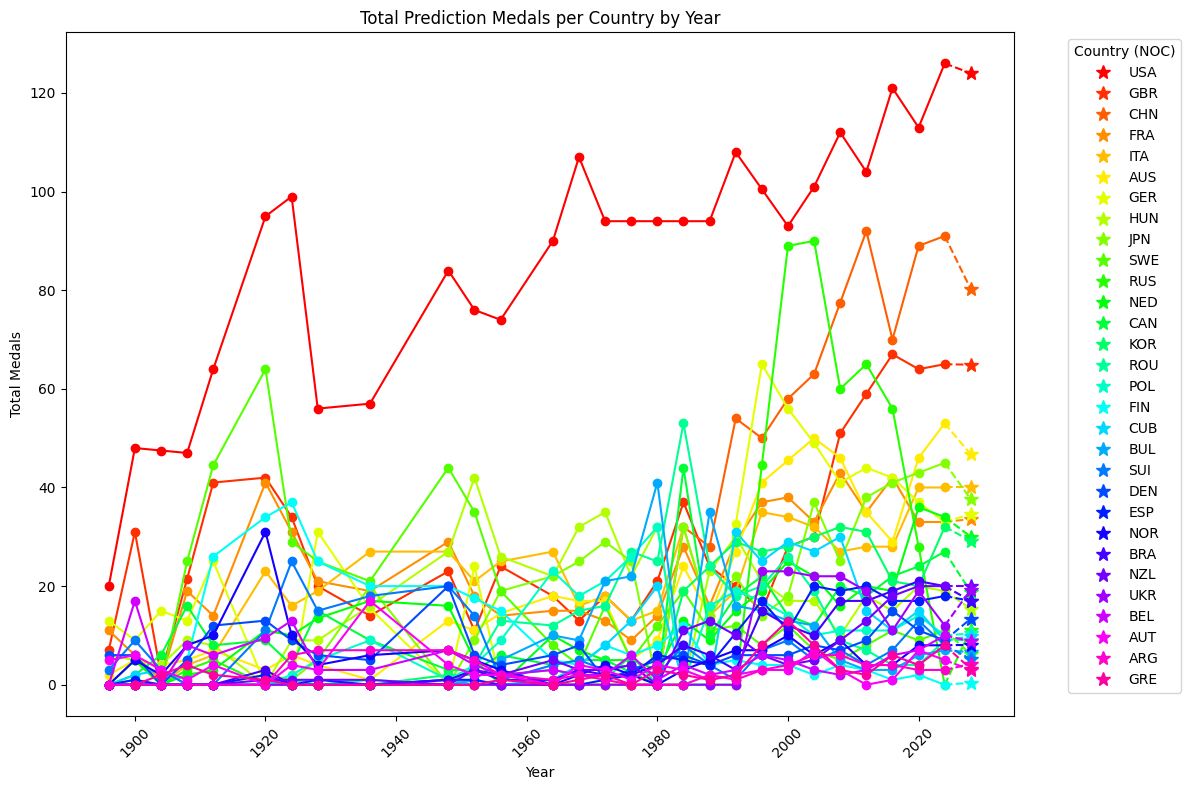

In [95]:
import numpy as np
import matplotlib.pyplot as plt

# 步骤一：定义状态空间，使用最近数据进行状态划分
num_states = 5  # 将参与人数划分为5个状态
decay_factor = 0.9  # 时间加权因子
smooth_constant = 1e-4  # 平滑常数

# 选择前10个国家，可以根据某种标准排序
top_countries = medals_by_year_clean_cluster_0_columns.sum().sort_values(ascending=False).index

# 创建一个空的图形，用来绘制所有国家的结果
plt.figure(figsize=(12, 8))

# 遍历前10个国家，进行预测
for index, country in enumerate(top_countries):
    country_table = medals_by_year_clean_cluster_0_columns[country]

    # 获取每个国家的年份和参与人数
    years = medals_by_year_clean_cluster_0_columns.index.values
    participants = country_table.values

    # 使用最近的数据来计算状态划分
    recent_years_participants = participants[-5:]  # 只考虑最近5年的数据
    state_bins = np.percentile(recent_years_participants, np.linspace(0, 100, num_states + 1))  # 根据百分位数划分
    states = np.digitize(participants, state_bins) - 1  # 将参与人数映射为状态索引

    # 修正：确保状态值在0到num_states-1之间
    states = np.clip(states, 0, num_states - 1)

    # 引入时间加权，给较近年份更高权重
    weights = np.array([decay_factor ** (len(years) - i) for i in range(len(years))])

    # 计算加权状态转移矩阵
    transition_matrix = np.zeros((num_states, num_states))

    for i in range(len(states) - 1):
        current_state = states[i]
        next_state = states[i + 1]
        
        # 加权转移次数
        weight = weights[i]
        transition_matrix[current_state, next_state] += weight

    # 将转移次数转化为概率
    row_sums = transition_matrix.sum(axis=1, keepdims=True)
    row_sums[row_sums == 0] = 1  # 将零行的总和设置为1，以避免除零错误

    # 对转移矩阵进行平滑处理，防止出现零概率
    transition_matrix += smooth_constant
    transition_matrix = transition_matrix / transition_matrix.sum(axis=1, keepdims=True)  # 重新归一化

    # 步骤三：预测未来状态
    current_state = states[-1]  # 假设当前状态是最后一年的状态

    # 预测下一个状态
    future_state_probs = transition_matrix[current_state]

    # 如果概率包含 NaN 或零概率，进行处理
    future_state_probs = np.nan_to_num(future_state_probs, nan=1.0)  # 将 NaN 替换为 1，确保概率有效

    # 确保概率和为1
    future_state_probs /= np.sum(future_state_probs)

    # 使用概率选择下一个状态
    predicted_future_state = np.random.choice(range(num_states), p=future_state_probs)

    # 将预测的状态映射回参与人数区间
    predicted_participation = (state_bins[predicted_future_state] + state_bins[predicted_future_state + 1]) / 2

    # 绘制原始数据
    line_color = plt.cm.hsv(index*8)  # 使用不同的颜色图
    plt.plot(years, participants, marker='o', linestyle='-', markersize=6, color=line_color)

    # 预测的参与人数和实际数据的连接（虚线）
    plt.plot([years[-1], years[-1] + 4], [participants[-1], predicted_participation], linestyle='--', color=line_color)

    # 显示预测的参与人数，稍微向后移动预测的 x 轴位置
    plt.plot(years[-1] + 4, predicted_participation, '*', label=f'{country}', markersize=10, color=line_color)

# 添加标题和标签
plt.title('Total Prediction Medals per Country by Year')
plt.xlabel('Year')
plt.ylabel('Total Medals')
plt.xticks(rotation=45)
plt.legend(title='Country (NOC)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## 1.8 时间序列
- tensorflow框架
- lstm模型
- 关注过去10次奥运
- 设置时间权重，越近的年份关注的权重越大

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

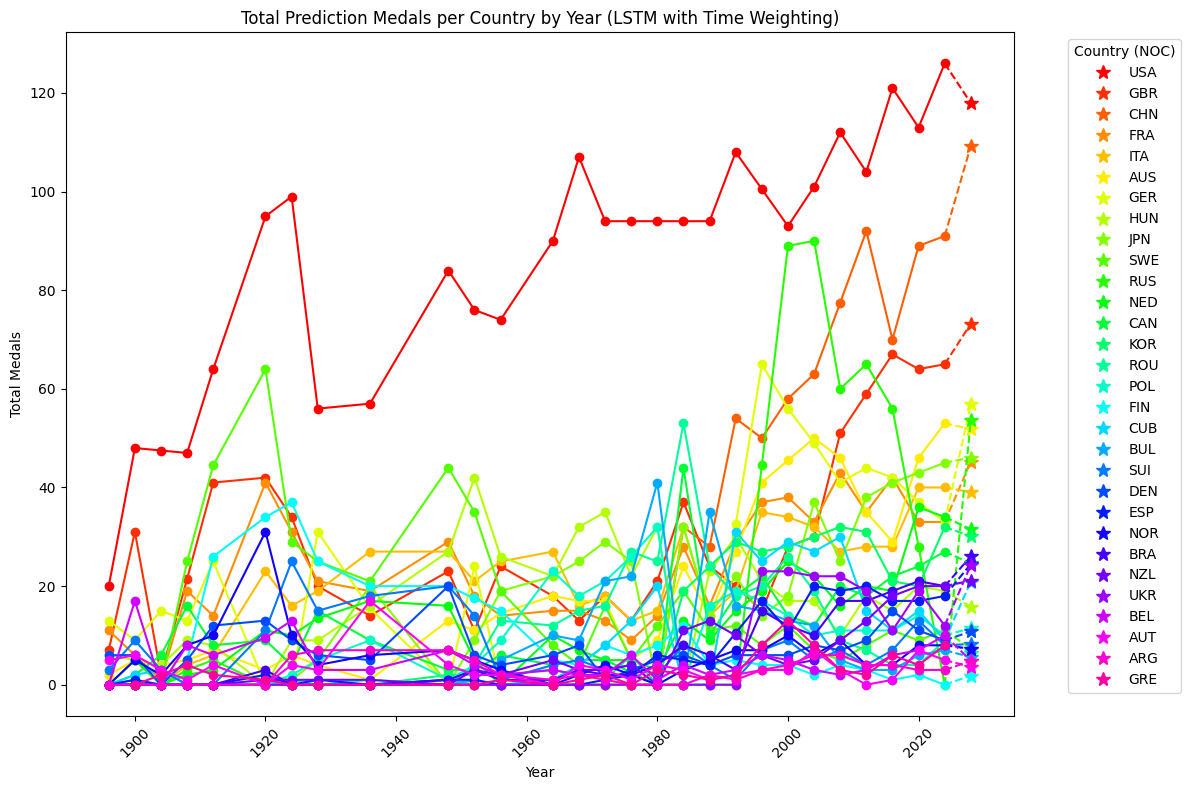

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input

# 选择前10个国家
top_countries = medals_by_year_clean_cluster_0_columns.sum().sort_values(ascending=False).index

# 创建一个空的图形，用来绘制所有国家的结果
plt.figure(figsize=(12, 8))

# 处理每个国家
for index, country in enumerate(top_countries):
    country_table = medals_by_year_clean[country]

    # 获取每个国家的年份和参与人数
    years = medals_by_year_clean.index.values
    participants = country_table.values

    # 数据预处理：标准化
    scaler = MinMaxScaler(feature_range=(0, 1))
    participants_scaled = scaler.fit_transform(participants.reshape(-1, 1))

    # 创建时间步数据（滑动窗口）
    def create_dataset(data, time_step=1):
        X, y = [], []
        for i in range(len(data) - time_step - 1):
            X.append(data[i:(i + time_step), 0])
            y.append(data[i + time_step, 0])
        return np.array(X), np.array(y)

    time_step = 20  # 使用过去20次的数据来预测
    X, y = create_dataset(participants_scaled, time_step)

    # 重塑输入数据形状为 [samples, time steps, features]
    X = X.reshape(X.shape[0], X.shape[1], 1)

    # 引入时间加权，给较近的时间点权重越大
    decay_factor = 0.9  # 越近的时间点权重越大
    weights = np.array([decay_factor ** (len(years) - i) for i in range(len(years))])

    # 3. LSTM 模型构建
    model = Sequential()
    model.add(Input(shape=(X.shape[1], 1)))  # 第一层 Input
    model.add(LSTM(units=50, return_sequences=False))  # LSTM 层
    model.add(Dense(units=1))  # 输出一个预测值
    model.compile(optimizer='adam', loss='mean_squared_error')

    # 4. 模型训练：使用加权的损失
    model.fit(X, y, epochs=50, batch_size=32, verbose=0, sample_weight=weights[:len(X)])

    # 5. 预测未来参与人数
    last_data = participants_scaled[-time_step:]  # 使用最后几个时间步的数据
    last_data = last_data.reshape(1, time_step, 1)
    predicted_scaled = model.predict(last_data)

    # 将预测的结果从归一化还原到原始数据范围
    predicted_participation = scaler.inverse_transform(predicted_scaled)

    # 绘制原始数据
    line_color = plt.cm.hsv(index*8)  # 使用不同的颜色图
    plt.plot(years, participants, marker='o', linestyle='-', markersize=6, color=line_color)

    # 显示预测的参与人数，稍微向后移动预测的 x 轴位置
    plt.plot(years[-1] + 4, predicted_participation[0], '*', label=f'{country}', markersize=10, color=line_color)

    # 连接预测点和实际数据的最后一点，使用虚线
    plt.plot([years[-1], years[-1] + 4], [participants[-1], predicted_participation[0][0]], '--', color=line_color)

# 添加标题和标签
plt.title('Total Prediction Medals per Country by Year (LSTM with Time Weighting)')
plt.xlabel('Year')
plt.ylabel('Total Medals')
plt.xticks(rotation=45)
plt.legend(title='Country (NOC)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# 2. 决策树回归第一次获奖概率
## 2.1 获取没有获奖的国家

### 总项目统计

<Figure size 1000x600 with 0 Axes>

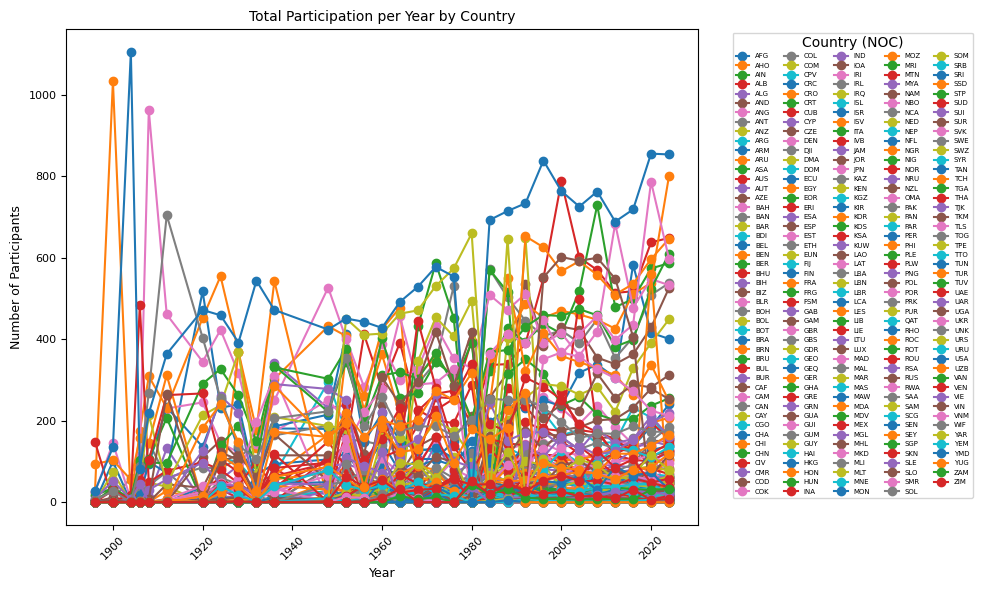

In [97]:
import matplotlib.pyplot as plt

# 按年份和国家（NOC）统计参赛人数
participation_by_year_country = athletes.groupby(['Year', 'NOC']).size().unstack(fill_value=0)

# 绘制折线图
plt.figure(figsize=(10, 6))
participation_by_year_country.plot(kind='line', marker='o', figsize=(10, 6))

# 设置标题、标签和图例的字体大小
plt.title('Total Participation per Year by Country', fontsize=10)  # 设置标题字体大小
plt.xlabel('Year', fontsize=9)  # 设置 x 轴标签字体大小
plt.ylabel('Number of Participants', fontsize=9)  # 设置 y 轴标签字体大小
plt.xticks(rotation=45, fontsize=8)  # 设置 x 轴刻度字体大小
plt.yticks(fontsize=8)  # 设置 y 轴刻度字体大小

# 设置图例的字体大小
plt.legend(title='Country (NOC)', fontsize=5, title_fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left', ncol=5)

plt.tight_layout()
plt.show()


In [98]:
participation_by_year_country

NOC,AFG,AHO,AIN,ALB,ALG,AND,ANG,ANT,ANZ,ARG,...,VIE,VIN,VNM,WIF,YAR,YEM,YMD,YUG,ZAM,ZIM
Year,,,,,,,,,,,,,,,,,,,,,
1896,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1900,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1904,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1906,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1908,0,0,0,0,0,0,0,0,48,1,...,0,0,0,0,0,0,0,0,0,0
1912,0,0,0,0,0,0,0,0,38,0,...,0,0,0,0,0,0,0,0,0,0
1920,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,15,0,0
1924,0,0,0,0,0,0,0,0,0,109,...,0,0,0,0,0,0,0,114,0,0
1928,0,0,0,0,0,0,0,0,0,98,...,0,0,0,0,0,0,0,86,0,2


In [99]:
# 假设 NOC 是你想要删除的列名
noc_names_to_remove = medal_counts['NOC'].unique()

# 删除对应的列
participation_by_year_country_without_medal = participation_by_year_country.drop(columns=noc_names_to_remove, errors='ignore')
participation_by_year_country_without_medal

NOC,AHO,AIN,AND,ANG,ANZ,ARU,ASA,BAN,BAR,BEN,...,UAE,UAR,UNK,VAN,VIE,VIN,WIF,YAR,YEM,YMD
Year,,,,,,,,,,,,,,,,,,,,,
1896,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1900,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1904,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1906,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1908,0,0,0,0,48,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1912,0,0,0,0,38,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
1920,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1924,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1928,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
